In [1]:
cd

C:\Users\khenk


In [3]:
cd Desktop/ESS

C:\Users\khenk\Desktop\ESS


In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [220]:
#read in datafile - all wells (2 million +) 
GIS_Data = pd.read_csv('NM_wells_status_A_clustered_50_meter_threshold.csv', sep=',', encoding = 'utf8')
Production_data = pd.read_csv('AllWells-NMOCD.csv', sep=',', encoding = 'utf8')
data=pd.read_csv('AllWells_New.csv', sep=',', encoding = 'utf8')
SJ = pd.read_csv('SanJuanBasin.csv', sep=',', encoding = 'utf8')
Permian = pd.read_csv('PermianBasin.csv', sep=',', encoding = 'utf8')

Well2017 = pd.read_csv('2017_active_wells_NM.csv', sep=',', encoding = 'utf8')

In [195]:
Well2017.head()

,API_NO,FIRST_PROD_DATETIME,LAST_PROD_DATETIME,LATEST_GAS,LATEST_LIQ,STATE,status,age_days,life_age_days,COUNTY_CODE,ACTIVE_OR_REMOVED,NEMS_STATE,LATEST_YEAR_PRODUCING,FIRST_YEAR_PRODUCING
0,30-005-60034-00,1970-01-01 00:00:00.000,2017-06-01 00:00:00.000,202.0,0.0,NM,ACTIVE,17318,19358,5.0,active,NMSW,2017.0,1970.0
1,30-005-00894-00,1970-01-01 00:00:00.000,2017-05-01 00:00:00.000,0.0,1.0,NM,ACTIVE,17287,22129,5.0,active,NMSW,2017.0,1970.0
2,30-005-00945-00,1970-01-01 00:00:00.000,2017-03-01 00:00:00.000,2681.0,496.0,NM,ACTIVE,17226,20423,5.0,active,NMSW,2017.0,1970.0
3,30-005-01024-00,1970-01-01 00:00:00.000,1999-03-01 00:00:00.000,0.0,1.0,NM,ACTIVE INJ,10651,15156,5.0,active,NMSW,1999.0,1970.0
4,30-005-10447-00,1970-01-01 00:00:00.000,2017-05-01 00:00:00.000,0.0,4.0,NM,ACTIVE,17287,18293,5.0,active,NMSW,2017.0,1970.0


In [196]:
Well2017.groupby(by='status').count()

,API_NO,FIRST_PROD_DATETIME,LAST_PROD_DATETIME,LATEST_GAS,LATEST_LIQ,STATE,age_days,life_age_days,COUNTY_CODE,ACTIVE_OR_REMOVED,NEMS_STATE,LATEST_YEAR_PRODUCING,FIRST_YEAR_PRODUCING
status,,,,,,,,,,,,,
ACTIVE,56760,56760,56760,56760,56760,56760,56760,56760,56760,56760,56760,56760,56760
ACTIVE INJ,1911,1911,1911,1911,1911,1911,1911,1911,1911,1911,1911,1911,1911


In [221]:
Well2017['Yearly_GAS'] = Well2017['LATEST_GAS']*12
Well2017['Yearly_LIQ'] = Well2017['LATEST_LIQ']*12
Well2017['BOE_2017'] = (((Well2017.Yearly_GAS)/6)+(Well2017.Yearly_LIQ))

In [249]:
Well2017 = Well2017.drop(Well2017[Well2017.FIRST_YEAR_PRODUCING <1970].index)

In [281]:
Groups = Well2017.groupby(pd.cut(Well2017["FIRST_YEAR_PRODUCING"], np.arange(1969, 2020,5))).sum()

In [282]:
Groups

,LATEST_GAS,LATEST_LIQ,age_days,life_age_days,COUNTY_CODE,LATEST_YEAR_PRODUCING,FIRST_YEAR_PRODUCING,Yearly_GAS,Yearly_LIQ,BOE_2017
FIRST_YEAR_PRODUCING,,,,,,,,,,
"(1969, 1974]",4982934.0,1650883.0,90958840,107173451,144240.0,11673809.0,11426567.0,59795208.0,19810596.0,29776464.0
"(1974, 1979]",7333646.0,2608306.0,49422238,59090052,116515.0,7093658.0,6958534.0,88003752.0,31299672.0,45966964.0
"(1979, 1984]",6138861.0,2426832.0,58624504,73028586,148376.0,9443497.0,9282878.0,73666332.0,29121984.0,41399706.0
"(1984, 1989]",10797026.0,3310715.0,32526322,44414128,93218.0,6462095.0,6373143.0,129564312.0,39728580.0,61322632.0
"(1989, 1994]",10662117.0,692648.0,41073003,61581398,143687.0,9660931.0,9548679.0,127945404.0,8311776.0,29636010.0
"(1994, 1999]",5716305.0,249546.0,33186599,55388766,134756.0,9385533.0,9294334.0,68595660.0,2994552.0,14427162.0
"(1999, 2004]",12745310.0,303428.0,42563010,85299233,244287.0,15971926.0,15854953.0,152943720.0,3641136.0,29131756.0
"(2004, 2009]",17941752.0,491902.0,34868014,92608231,287931.0,19255625.0,19159632.0,215301024.0,5902824.0,41786328.0
"(2009, 2014]",19426966.0,2809839.0,13519227,63188906,174607.0,14956035.0,14918685.0,233123592.0,33718068.0,72572000.0


In [300]:
Groups1 = Well2017.groupby(pd.cut(Well2017["FIRST_YEAR_PRODUCING"], np.arange(1969, 2020,5))).count()

In [286]:
Groups['Percentage'] = Groups['BOE_2017']/sum(Groups['BOE_2017'])
Groups['Percentage']

FIRST_YEAR_PRODUCING
(1969, 1974]    0.068796
(1974, 1979]    0.106203
(1979, 1984]    0.095651
(1984, 1989]    0.141681
(1989, 1994]    0.068472
(1994, 1999]    0.033333
(1999, 2004]    0.067306
(2004, 2009]    0.096544
(2009, 2014]    0.167672
(2014, 2019]    0.154344
Name: Percentage, dtype: float64

In [266]:
x=np.asarray(Groups['Percentage'])

In [269]:
y = np.asarray(Groups1['Percentage'])

In [301]:
Groups1['Percentage']=Groups1['API_NO']/sum(Groups1['API_NO'])

In [318]:
Groups1['API_NO']/sum(Groups1['API_NO'])

FIRST_YEAR_PRODUCING
(1969, 1974]    0.108077
(1974, 1979]    0.065595
(1979, 1984]    0.087311
(1984, 1989]    0.059798
(1989, 1994]    0.089343
(1994, 1999]    0.086752
(1999, 2004]    0.147613
(2004, 2009]    0.177960
(2009, 2014]    0.138218
(2014, 2019]    0.039331
Name: API_NO, dtype: float64

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

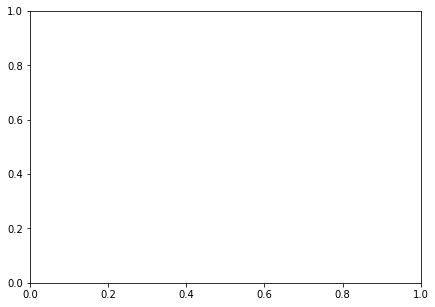

In [279]:
data_hist=Well2017.groupby(pd.cut(Well2017["FIRST_YEAR_PRODUCING"], np.arange(1969, 2020,5))).BOE_2017.sum()
data_hist2=Well2017.groupby(pd.cut(Well2017["FIRST_YEAR_PRODUCING"], np.arange(1969, 2020,5))).BOE_2017.count()
#data_hist.plot()

data_hist=data_hist/sum(data_hist)
data_hist2=data_hist2/sum(data_hist2)

plt.figure(figsize=(7,5))
bar_width=0.1

plt.bar(data_hist.index, data_hist, bar_width, label='Production Volume (BOE)')
plt.bar(data_hist2.index, data_hist2, bar_width, color='c', label='Well Count')
#plt.xlim((-0.5, 9.5))
plt.xticks(np.arange(1,5),('>9/17/2015','(8/23/2011  ,  9/17/2015)','(1/1/2007  ,  8/23/2011)','=<1/1/2007'),rotation='vertical') # Set locations and labels, ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50'])
plt.xlabel('Well Groups By Date')
plt.ylabel('Fraction')
plt.title('Age Distribution of Wells and Production')
plt.legend()
#plt.savefig('production_well_age.png')
plt.show()

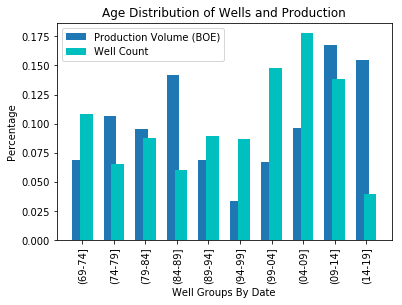

In [317]:

plt.bar(np.arange(0,20,2),Groups['Percentage'], label='Production Volume (BOE)')
plt.bar(np.arange(0,20,2)+.5,Groups1['Percentage'],color='c', label='Well Count'),
plt.xticks(np.arange(0,20,2)+.25,('(69-74]','(74-79]','(79-84]','(84-89]','(89-94]','(94-99]','(99-04]','(04-09]','(09-14]','(14-19]'),rotation='vertical') # Set locations and label
plt.xlabel('Well Groups By Date')
plt.ylabel('Percentage')
plt.title('Age Distribution of Wells and Production')
plt.legend()
plt.show()

In [311]:
Groups['Percentage']

FIRST_YEAR_PRODUCING
(1969, 1974]    0.068796
(1974, 1979]    0.106203
(1979, 1984]    0.095651
(1984, 1989]    0.141681
(1989, 1994]    0.068472
(1994, 1999]    0.033333
(1999, 2004]    0.067306
(2004, 2009]    0.096544
(2009, 2014]    0.167672
(2014, 2019]    0.154344
Name: Percentage, dtype: float64

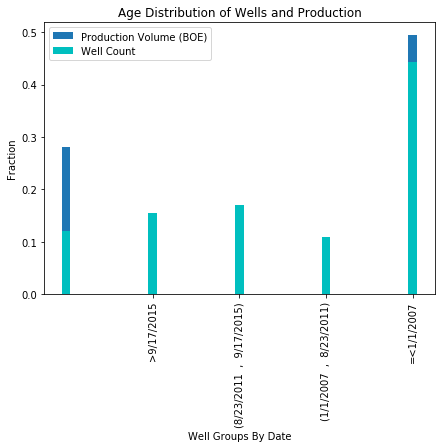

In [295]:
data_hist=Well2017.groupby(by=['category']).BOE_2017.sum()
data_hist2=Well2017.groupby(by=['category']).BOE_2017.count()
#data_hist.plot()

data_hist=data_hist/sum(data_hist)
data_hist2=data_hist2/sum(data_hist2)

plt.figure(figsize=(7,5))
bar_width=0.1

plt.bar(data_hist.index, data_hist, bar_width, label='Production Volume (BOE)')
plt.bar(data_hist2.index, data_hist2, bar_width, color='c', label='Well Count')
#plt.xlim((-0.5, 9.5))
plt.xticks(np.arange(1,5),('>9/17/2015','(8/23/2011  ,  9/17/2015)','(1/1/2007  ,  8/23/2011)','=<1/1/2007'),rotation='vertical') # Set locations and labels, ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50'])
plt.xlabel('Well Groups By Date')
plt.ylabel('Fraction')
plt.title('Age Distribution of Wells and Production')
plt.legend()
#plt.savefig('production_well_age.png')
plt.show()

In [233]:
Well2017['category']='NaN'
Well2017['FIRST_PROD_DATETIME'] = pd.to_datetime(Well2017['FIRST_PROD_DATETIME'])
Well2017.category[Well2017['FIRST_PROD_DATETIME']>pd.datetime(2012,1,1)]='A'
Well2017.category[(Well2017['FIRST_PROD_DATETIME']>pd.datetime(2007,1,1))&(Well2017['FIRST_PROD_DATETIME']<=pd.datetime(2012,1,1))]='B'
Well2017.category[(Well2017['FIRST_PROD_DATETIME']>pd.datetime(2002,1,1))&(Well2017['FIRST_PROD_DATETIME']<=pd.datetime(2007,1,1))]='C'
Well2017.category[(Well2017['FIRST_PROD_DATETIME']>pd.datetime(1997,1,1))&(Well2017['FIRST_PROD_DATETIME']<=pd.datetime(2002,1,1))]='D'
Well2017.category[Well2017['FIRST_PROD_DATETIME']<=pd.datetime(1997,1,1)]='E'

C:\Users\khenk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\khenk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\khenk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [231]:
Well2017['category']='NaN'
Well2017['FIRST_PROD_DATETIME'] = pd.to_datetime(Well2017['FIRST_PROD_DATETIME'])
Well2017.category[Well2017['FIRST_PROD_DATETIME']>pd.datetime(2015,9,17)]=1
Well2017.category[(Well2017['FIRST_PROD_DATETIME']>pd.datetime(2011,8,23))&(Well2017['FIRST_PROD_DATETIME']<=pd.datetime(2015,9,17))]=2
Well2017.category[(Well2017['FIRST_PROD_DATETIME']>pd.datetime(2007,1,1))&(Well2017['FIRST_PROD_DATETIME']<=pd.datetime(2011,8,23))]=3
Well2017.category[Well2017['FIRST_PROD_DATETIME']<=pd.datetime(2007,1,1)]=4

C:\Users\khenk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\khenk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\khenk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [ ]:
Well2017['category']='NaN'
Well2017['FIRST_PROD_DATETIME'] = pd.to_datetime(Well2017['FIRST_PROD_DATETIME'])
Well2017.category[Well2017['FIRST_PROD_DATETIME']>pd.datetime(2015,9,17)]=1
Well2017.category[(Well2017['FIRST_PROD_DATETIME']>pd.datetime(2011,8,23))&(Well2017['FIRST_PROD_DATETIME']<pd.datetime(2015,9,17))]=2
Well2017.category[(Well2017['FIRST_PROD_DATETIME']>pd.datetime(2007,1,1))&(Well2017['FIRST_PROD_DATETIME']<pd.datetime(2011,8,23))]=3
Well2017.category[Well2017['FIRST_PROD_DATETIME']<=pd.datetime(2007,1,1)]=4

In [218]:
Well2017.groupby(by='category').count()

,API_NO,FIRST_PROD_DATETIME,LAST_PROD_DATETIME,LATEST_GAS,LATEST_LIQ,STATE,status,age_days,life_age_days,COUNTY_CODE,ACTIVE_OR_REMOVED,NEMS_STATE,LATEST_YEAR_PRODUCING,FIRST_YEAR_PRODUCING,Yearly_GAS,Yearly_LIQ,BOE_2017
category,,,,,,,,,,,,,,,,,
A,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342
B,5797,5797,5797,5797,5797,5797,5797,5797,5797,5797,5797,5797,5797,5797,5797,5797,5797
C,7675,7675,7675,7675,7675,7675,7675,7675,7675,7675,7675,7675,7675,7675,7675,7675,7675
D,43857,43857,43857,43857,43857,43857,43857,43857,43857,43857,43857,43857,43857,43857,43857,43857,43857


In [202]:
Well2017[Well2017['category']==0]

,API_NO,FIRST_PROD_DATETIME,LAST_PROD_DATETIME,LATEST_GAS,LATEST_LIQ,STATE,status,age_days,life_age_days,COUNTY_CODE,ACTIVE_OR_REMOVED,NEMS_STATE,LATEST_YEAR_PRODUCING,FIRST_YEAR_PRODUCING,Yearly_GAS,Yearly_LIQ,BOE_2017,category
1609,30-005-63810-00,2007-01-01,2017-06-01 00:00:00.000,724.0,0.0,NM,ACTIVE,3804,13240,5.0,active,NMSW,2017.0,2007.0,8688.0,0.0,1448.0,0
10616,30-015-34993-00,2007-01-01,2017-06-01 00:00:00.000,274.0,103.0,NM,ACTIVE,3804,7364,15.0,active,NMSW,2017.0,2007.0,3288.0,1236.0,589.2,0
10617,30-015-35213-00,2007-01-01,2017-06-01 00:00:00.000,805.0,41.0,NM,ACTIVE,3804,4869,15.0,active,NMSW,2017.0,2007.0,9660.0,492.0,1626.4,0
10618,30-015-34600-00,2007-01-01,2017-06-01 00:00:00.000,344.0,0.0,NM,ACTIVE,3804,22127,15.0,active,NMSW,2017.0,2007.0,4128.0,0.0,688.0,0
10619,30-015-34963-00,2007-01-01,2017-06-01 00:00:00.000,1.0,0.0,NM,ACTIVE,3804,11535,15.0,active,NMSW,2017.0,2007.0,12.0,0.0,2.0,0
10620,30-015-35347-00,2007-01-01,2017-06-01 00:00:00.000,1406.0,0.0,NM,ACTIVE,3804,11719,15.0,active,NMSW,2017.0,2007.0,16872.0,0.0,2812.0,0
10621,30-015-34969-00,2007-01-01,2017-06-01 00:00:00.000,2209.0,173.0,NM,ACTIVE,3804,18019,15.0,active,NMSW,2017.0,2007.0,26508.0,2076.0,4487.2,0
10622,30-015-34899-00,2007-01-01,2017-06-01 00:00:00.000,1524.0,50.0,NM,ACTIVE,3804,4991,15.0,active,NMSW,2017.0,2007.0,18288.0,600.0,3068.0,0
10623,30-015-34906-00,2007-01-01,2017-06-01 00:00:00.000,102.0,0.0,NM,ACTIVE,3804,8156,15.0,active,NMSW,2017.0,2007.0,1224.0,0.0,204.0,0
10624,30-015-35054-00,2007-01-01,2017-06-01 00:00:00.000,115.0,0.0,NM,ACTIVE,3804,13606,15.0,active,NMSW,2017.0,2007.0,1380.0,0.0,230.0,0


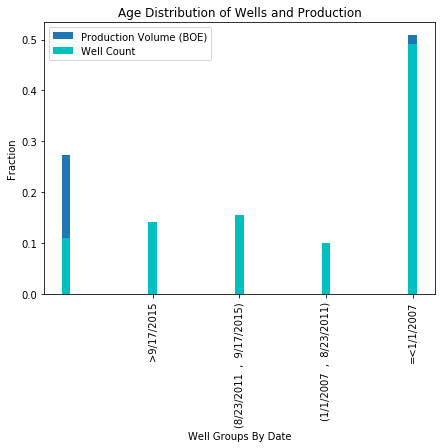

In [236]:
data_hist=Well2017.groupby(by=['category']).BOE_2017.sum()
data_hist2=Well2017.groupby(by=['category']).BOE_2017.count()
#data_hist.plot()

data_hist=data_hist/sum(data_hist)
data_hist2=data_hist2/sum(data_hist2)

plt.figure(figsize=(7,5))
bar_width=0.1

plt.bar(data_hist.index, data_hist, bar_width, label='Production Volume (BOE)')
plt.bar(data_hist2.index, data_hist2, bar_width, color='c', label='Well Count')
#plt.xlim((-0.5, 9.5))
plt.xticks(np.arange(1,5),('>9/17/2015','(8/23/2011  ,  9/17/2015)','(1/1/2007  ,  8/23/2011)','=<1/1/2007'),rotation='vertical') # Set locations and labels, ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50'])
plt.xlabel('Well Groups By Date')
plt.ylabel('Fraction')
plt.title('Age Distribution of Wells and Production')
plt.legend()
#plt.savefig('production_well_age.png')
plt.show()

In [210]:
data_hist

category
1    0.068362
2    0.178371
3    0.125051
4    0.628216
Name: BOE_2017, dtype: float64

In [7]:
data.head()

,ACRES,API,OPERATOR,PLUG_DATE,PRODUCING_POOLID,PROPERTY,RANGE,SDIV_UL,SECTION,SPUD_DATE,...,LATITUDE,LONGITUDE,NBR_COMPLS,NS_CD,OCD_UL,OGRID_CDE,oil_prod_2017,oil_prod_2018,oil_prod_2019,ONE_PRODUCING_POOL_NAME
0,NaN,3000100505,NORINS REALTY,8/12/1940,NaN,28142,04E,F,19,2/15/1936,...,35.170802,-106.565295,NaN,N,F,196274,NaN,NaN,NaN,NaN
1,NaN,3000105000,SOUTHERN UNION PRODUCING COMPANY,3/21/1964,NaN,25786,05E,M,12,3/7/1964,...,35.102531,-106.363228,NaN,S,NaN,187163,NaN,NaN,NaN,NaN
2,NaN,3000105001,SOUTHERN UNION PRODUCTION CO,4/10/1964,NaN,28132,05E,E,12,3/27/1964,...,35.106044,-106.351710,NaN,N,E,196291,NaN,NaN,NaN,NaN
3,40.0,3000105002,SOUTHERN UNION PRODUCTION CO,5/12/1965,NaN,28132,05E,D,12,4/24/1964,...,35.111025,-106.363320,1.0,N,D,196291,NaN,NaN,NaN,NaN
4,NaN,3000105003,NORINS REALTY,2/23/1946,NaN,28128,01E,B,22,9/27/1938,...,35.000103,-106.823754,NaN,N,B,196274,NaN,NaN,NaN,NaN


In [21]:
data.columns

Index(['API', 'PLUG_DATE', 'SPUD_DATE', 'COMPL_STATUS', 'COUNTY',
       'gas_prod_2017', 'gas_prod_2018', 'gas_prod_2019', 'oil_prod_2017',
       'oil_prod_2018', 'oil_prod_2019'],
      dtype='object')

In [186]:
data.drop(labels=['ACRES', 'OPERATOR', 'PRODUCING_POOLID', 'PROPERTY',
       'RANGE', 'SDIV_UL', 'SECTION', 'TOWNSHIP', 'TVD_DEPTH',
       'water_inj_2017', 'water_inj_2018', 'water_inj_2019', 'water_prod_2017',
       'water_prod_2018', 'water_prod_2019', 'WELL_NAME', 'WELL_TYPE',
       'days_prod_2017', 'days_prod_2018',
       'days_prod_2019', 'ELEVGL', 'EW_CD', 'FTG_EW', 'FTG_NS','LAND_TYPE',
       'LAST_PROD_INJ', 'LATITUDE', 'LONGITUDE', 'NBR_COMPLS', 'NS_CD',
       'OCD_UL', 'OGRID_CDE', 'ONE_PRODUCING_POOL_NAME','gas_prod_2017', 'gas_prod_2018', 'gas_prod_2019', 'oil_prod_2017',
       'oil_prod_2018', 'oil_prod_2019','COMPL_STATUS'], axis=1, inplace=True)

In [9]:
Production_data.columns

Index(['API', 'RANGE', 'SECTION', 'TOWNSHIP', 'TVD_DEPTH', 'WELL_NAME',
       'WELL_TYPE', 'COMPL_STATUS', 'COUNTY', 'days_prod_2017',
       'days_prod_2018', 'ELEVGL', 'gas_prod_2017', 'gas_prod_2018',
       'LAND_TYPE', 'LAST_PROD_INJ', 'LATITUDE', 'LONGITUDE', 'NBR_COMPLS',
       'oil_prod_2017', 'oil_prod_2018', 'oil_prod_2019'],
      dtype='object')

In [187]:
Production_data.drop(labels=['RANGE', 'SECTION', 'TOWNSHIP', 'TVD_DEPTH', 'WELL_NAME',
       'WELL_TYPE','COUNTY','ELEVGL','LAST_PROD_INJ', 'LATITUDE', 'LONGITUDE', 'NBR_COMPLS'],axis=1, inplace=True)

In [31]:
Production_data.head()

,API,COMPL_STATUS,days_prod_2017,days_prod_2018,gas_prod_2017,gas_prod_2018,LAND_TYPE,oil_prod_2017,oil_prod_2018,oil_prod_2019
0,3000562660,Active,131.0,365.0,2305.0,315.0,S,0.0,0.0,0.0
1,3000564005,Active,365.0,348.0,0.0,0.0,S,235.0,113.0,NaN
2,3000563830,Active,365.0,365.0,18705.0,45253.0,P,0.0,0.0,NaN
3,3000563879,Active,365.0,365.0,9524.0,8642.0,P,0.0,0.0,NaN
4,3000563880,Active,365.0,365.0,16427.0,22153.0,P,0.0,0.0,NaN


In [12]:
Production_data.shape

(48774, 10)

In [177]:
data.shape

(111442, 44)

In [178]:
data['PLUG_DATE'].fillna('5/6/2019',inplace = True)  

In [188]:
data['category']=0
data['SPUD_DATE'] = pd.to_datetime(data['SPUD_DATE'])
data.category[data['SPUD_DATE']>pd.datetime(2015,9,17)]=1
data.category[(data['SPUD_DATE']>pd.datetime(2011,8,23))&(data['SPUD_DATE']<pd.datetime(2015,9,17))]=2
data.category[(data['SPUD_DATE']>pd.datetime(2007,1,1))&(data['SPUD_DATE']<pd.datetime(2011,8,23))]=3
data.category[data['SPUD_DATE']<pd.datetime(2007,1,1)]=4

C:\Users\khenk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\khenk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\khenk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [189]:
data = data.dropna(subset = ['SPUD_DATE'])

In [181]:
data.shape

(90156, 45)

In [190]:
data.groupby(by='category').count()

,API,PLUG_DATE,SPUD_DATE,COUNTY
category,,,,
0,14,0,14,14
1,2804,27,2804,2804
2,5151,202,5151,5151
3,6515,484,6515,6515
4,75672,34191,75672,75672


In [119]:
Production_data.groupby('COMPL_STATUS').count()

,API,days_prod_2017,days_prod_2018,gas_prod_2017,gas_prod_2018,LAND_TYPE,oil_prod_2017,oil_prod_2018,oil_prod_2019
COMPL_STATUS,,,,,,,,,
Active,48774,44599,44314,44599,44314,48772,44599,44314,48


In [13]:
data.shape

(111442, 11)

In [191]:
Full_Data = Production_data.merge(data, how='left', on='API')
#Full_Data = Full_Data.merge(Permian, how='left', on='API')

In [192]:
Full_Data.groupby(by='category').count()

,API,COMPL_STATUS,days_prod_2017,days_prod_2018,gas_prod_2017,gas_prod_2018,LAND_TYPE,oil_prod_2017,oil_prod_2018,oil_prod_2019,PLUG_DATE,SPUD_DATE,COUNTY
category,,,,,,,,,,,,,
0.0,5,5,5,4,5,4,5,5,4,0,0,5,5
1.0,9,9,4,5,4,5,9,4,5,0,0,9,9
2.0,128,128,119,118,119,118,128,119,118,0,0,128,128
3.0,3101,3101,3023,3019,3023,3019,3101,3023,3019,3,0,3101,3101
4.0,40659,40659,37929,37687,37929,37687,40657,37929,37687,31,0,40659,40659


In [130]:
data.PLUG_DATE

0          8/12/1940
1          3/21/1964
2          4/10/1964
3          5/12/1965
4          2/23/1946
5          9/29/1948
6           1/1/1900
7           1/1/1900
8           5/7/1934
9          6/19/1978
10        12/26/1972
11         12/5/1978
12         5/25/1980
13          4/8/1982
14         7/14/1984
15         9/26/1997
16         9/22/2008
17          1/1/1949
18          5/6/2019
19          6/2/2005
20         9/21/2005
21        12/21/1973
22         9/22/2008
23          5/6/2019
24          1/1/1900
25          1/1/1900
26          9/3/1959
27         9/23/1966
28          1/1/1900
29          1/1/1900
             ...    
111412      1/1/1900
111413      1/1/1900
111414      1/1/1900
111415      1/1/1900
111416      1/1/1900
111417      1/1/1900
111418      1/1/1900
111419      1/1/1900
111420      1/1/1900
111421      1/1/1900
111422      1/1/1900
111423      1/1/1900
111424      1/1/1900
111425      1/1/1900
111426      1/1/1900
111427      1/1/1900
111428      1

In [131]:
Full_Data.groupby(by='PLUG_DATE').count()

,API,COMPL_STATUS,days_prod_2017,days_prod_2018,gas_prod_2017,gas_prod_2018,LAND_TYPE,oil_prod_2017,oil_prod_2018,oil_prod_2019,SPUD_DATE,COUNTY
PLUG_DATE,,,,,,,,,,,,
5/6/2019,48774,48774,44599,44314,44599,44314,48772,44599,44314,48,43902,48774


In [100]:
data.groupby(by='PLUG_DATE').count()

,API,SPUD_DATE,COUNTY
PLUG_DATE,,,
1/1/1900,14917,14898,14917
1/1/1901,822,807,822
1/1/1922,1,0,1
1/1/1945,1,0,1
1/1/1949,1,1,1
1/1/1957,1,1,1
1/1/1961,1,1,1
1/1/1964,1,1,1
1/1/1965,1,1,1


In [164]:
Full_Data['BOE_2018'] = (((Full_Data.gas_prod_2018)/6)+(Full_Data.oil_prod_2018)/30)

In [124]:
Full_Data.shape

(111442, 13)

In [165]:
Full_Data = Full_Data.dropna(subset = ['SPUD_DATE'])
Full_Data.shape

(43902, 14)

In [104]:
Full_Data['PLUG_DATE'].fillna('5/6/2019',inplace = True)
Full_Data.shape

(43902, 14)

In [105]:
Full_Data = Full_Data.dropna(subset= ['PLUG_DATE'])
Full_Data.shape

(43902, 14)

In [113]:
Full_Data['PLUG_DATE'].fillna('05/06/2019',inplace = True)
#Must Drop No Spud Dates
Full_Data = Full_Data.dropna(subset = ['SPUD_DATE'])
Full_Data = Full_Data.dropna(subset= ['PLUG_DATE'])
Full_Data.shape



(43902, 14)

In [139]:
Full_Data['AGE'] = Full_Data['year_last']-Full_Data['year_first']

In [140]:
Full_Data.head()

,API,COMPL_STATUS,days_prod_2017,days_prod_2018,gas_prod_2017,gas_prod_2018,LAND_TYPE,oil_prod_2017,oil_prod_2018,oil_prod_2019,PLUG_DATE,SPUD_DATE,COUNTY,year_last,year_first,AGE
0,3000562660,Active,131.0,365.0,2305.0,315.0,S,0.0,0.0,0.0,5/6/2019,1/3/1989,Chaves,2019,1989,30
1,3000564005,Active,365.0,348.0,0.0,0.0,S,235.0,113.0,NaN,5/6/2019,3/8/2008,Chaves,2019,2008,11
2,3000563830,Active,365.0,365.0,18705.0,45253.0,P,0.0,0.0,NaN,5/6/2019,9/2/2006,Chaves,2019,2006,13
3,3000563879,Active,365.0,365.0,9524.0,8642.0,P,0.0,0.0,NaN,5/6/2019,4/21/2008,Chaves,2019,2008,11
4,3000563880,Active,365.0,365.0,16427.0,22153.0,P,0.0,0.0,NaN,5/6/2019,5/8/2008,Chaves,2019,2008,11


In [156]:
Full_Data.groupby(by='category').count()

,API,COMPL_STATUS,days_prod_2017,days_prod_2018,gas_prod_2017,gas_prod_2018,LAND_TYPE,oil_prod_2017,oil_prod_2018,oil_prod_2019,PLUG_DATE,SPUD_DATE,COUNTY,year_last,year_first,AGE
category,,,,,,,,,,,,,,,,
1,9,9,4,5,4,5,9,4,5,0,9,9,9,9,9,9
NaN,43893,43893,41076,40828,41076,40828,43891,41076,40828,34,43893,43893,43893,43893,43893,43893


In [157]:
Full_Data.groupby(by='AGE').count()

,API,COMPL_STATUS,days_prod_2017,days_prod_2018,gas_prod_2017,gas_prod_2018,LAND_TYPE,oil_prod_2017,oil_prod_2018,oil_prod_2019,PLUG_DATE,SPUD_DATE,COUNTY,year_last,year_first,category
AGE,,,,,,,,,,,,,,,,
1,5,5,2,2,2,2,5,2,2,0,5,5,5,5,5,5
2,2,2,1,2,1,2,2,1,2,0,2,2,2,2,2,2
3,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
4,5,5,1,1,1,1,5,1,1,0,5,5,5,5,5,5
5,23,23,23,22,23,22,23,23,22,0,23,23,23,23,23,23
6,34,34,33,33,33,33,34,33,33,0,34,34,34,34,34,34
7,45,45,42,42,42,42,45,42,42,0,45,45,45,45,45,45
8,121,121,116,111,116,111,121,116,111,0,121,121,121,121,121,121
9,102,102,96,96,96,96,102,96,96,0,102,102,102,102,102,102


In [166]:
Full_Data['category']='NaN'

In [167]:
Full_Data['SPUD_DATE'] = pd.to_datetime(Full_Data['SPUD_DATE'])

In [153]:
from datetime import datetime

In [168]:
Full_Data.category[Full_Data['SPUD_DATE']>pd.datetime(2015,9,17)]=1

C:\Users\khenk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [169]:
Full_Data.groupby(by='category').count()

,API,COMPL_STATUS,days_prod_2017,days_prod_2018,gas_prod_2017,gas_prod_2018,LAND_TYPE,oil_prod_2017,oil_prod_2018,oil_prod_2019,PLUG_DATE,SPUD_DATE,COUNTY,BOE_2018
category,,,,,,,,,,,,,,
1,9,9,4,5,4,5,9,4,5,0,9,9,9,5
NaN,43893,43893,41076,40828,41076,40828,43891,41076,40828,34,43893,43893,43893,40828


In [174]:
data['category']=0
data['SPUD_DATE'] = pd.to_datetime(data['SPUD_DATE'])
data.category[data['SPUD_DATE']>pd.datetime(2015,9,17)]=1
data.category[(data['SPUD_DATE']>pd.datetime(2011,8,23))&(data['SPUD_DATE']<pd.datetime(2015,9,17))]=2
data.category[(data['SPUD_DATE']>pd.datetime(2007,1,1))&(data['SPUD_DATE']<pd.datetime(2011,8,23))]=3
data.category[data['SPUD_DATE']<pd.datetime(2007,1,1)]=4

C:\Users\khenk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\khenk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\khenk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [175]:
data.groupby(by='category').count()

,API,PLUG_DATE,SPUD_DATE,COUNTY
category,,,,
0,21300,21300,14,21300
1,2804,2804,2804,2804
2,5151,5151,5151,5151
3,6515,6515,6515,6515
4,75672,75672,75672,75672


In [135]:
# #pull year out of first and last production date and make new column
Full_Data['year_last']=pd.DatetimeIndex(Full_Data['PLUG_DATE']).year

In [137]:
Full_Data['year_first']=pd.DatetimeIndex(Full_Data['SPUD_DATE']).year

In [138]:
Full_Data.shape

(43902, 15)

In [111]:
Full_Data.head()

,API,COMPL_STATUS,days_prod_2017,days_prod_2018,gas_prod_2017,gas_prod_2018,LAND_TYPE,oil_prod_2017,oil_prod_2018,oil_prod_2019,PLUG_DATE,SPUD_DATE,COUNTY,BOE_2018
0,3000562660,Active,131.0,365.0,2305.0,315.0,S,0.0,0.0,0.0,5/6/2019,1/3/1989,Chaves,52.500000
1,3000564005,Active,365.0,348.0,0.0,0.0,S,235.0,113.0,NaN,5/6/2019,3/8/2008,Chaves,3.766667
2,3000563830,Active,365.0,365.0,18705.0,45253.0,P,0.0,0.0,NaN,5/6/2019,9/2/2006,Chaves,7542.166667
3,3000563879,Active,365.0,365.0,9524.0,8642.0,P,0.0,0.0,NaN,5/6/2019,4/21/2008,Chaves,1440.333333
4,3000563880,Active,365.0,365.0,16427.0,22153.0,P,0.0,0.0,NaN,5/6/2019,5/8/2008,Chaves,3692.166667


In [20]:
Full_Data.columns

Index(['API', 'COMPL_STATUS_x', 'days_prod_2017', 'days_prod_2018',
       'gas_prod_2017_x', 'gas_prod_2018_x', 'LAND_TYPE', 'oil_prod_2017_x',
       'oil_prod_2018_x', 'oil_prod_2019_x', 'PLUG_DATE', 'SPUD_DATE',
       'COMPL_STATUS_y', 'COUNTY', 'gas_prod_2017_y', 'gas_prod_2018_y',
       'gas_prod_2019', 'oil_prod_2017_y', 'oil_prod_2018_y',
       'oil_prod_2019_y'],
      dtype='object')

In [625]:
GIS_Data['API']

0        3002506785
1        3002521920
2        3002521278
3        3001525468
4        3001525364
5        3001525788
6        3001525527
7        3001525646
8        3001532259
9        3001525392
10       3001525572
11       3001525733
12       3001525672
13       3001526035
14       3001525462
15       3001502758
16       3001525375
17       3001525528
18       3001502752
19       3001502759
20       3001525304
21       3001525363
22       3001525606
23       3001524131
24       3001501438
25       3001524345
26       3001525580
27       3002527822
28       3004526102
29       3003906652
            ...    
57180    3002543490
57181    3002543545
57182    3002543551
57183    3001543047
57184    3002543474
57185    3002543699
57186    3002543700
57187    3001544043
57188    3002543697
57189    3002544397
57190    3002543698
57191    3002543552
57192    3002543564
57193    3001542941
57194    3002543849
57195    3002543682
57196    3001543046
57197    3001543045
57198    3001543399


In [425]:
len(Full_Data)

111442

In [426]:
SJ.columns

Index(['ACRES', 'API', 'OPERATOR', 'PLUG_DATE', 'PRODUCING_POOLID', 'PROPERTY',
       'RANGE', 'SDIV_UL', 'SECTION', 'SPUD_DATE', 'TOWNSHIP', 'TVD_DEPTH',
       'water_inj_2017', 'water_inj_2018', 'water_inj_2019', 'water_prod_2017',
       'water_prod_2018', 'water_prod_2019', 'WELL_NAME', 'WELL_TYPE',
       'COMPL_STATUS', 'COUNTY', 'days_prod_2017', 'days_prod_2018',
       'days_prod_2019', 'ELEVGL', 'EW_CD', 'FTG_EW', 'FTG_NS',
       'gas_prod_2017', 'gas_prod_2018', 'gas_prod_2019', 'LAND_TYPE',
       'LAST_PROD_INJ', 'LATITUDE', 'LONGITUDE', 'NBR_COMPLS', 'NS_CD',
       'OCD_UL', 'OGRID_CDE', 'oil_prod_2017', 'oil_prod_2018',
       'oil_prod_2019', 'ONE_PRODUCING_POOL_NAME'],
      dtype='object')

In [427]:
Permian.groupby('COUNTY').count()

,ACRES,API,OPERATOR,PLUG_DATE,PRODUCING_POOLID,PROPERTY,RANGE,SDIV_UL,SECTION,SPUD_DATE,...,LATITUDE,LONGITUDE,NBR_COMPLS,NS_CD,OCD_UL,OGRID_CDE,oil_prod_2017,oil_prod_2018,oil_prod_2019,ONE_PRODUCING_POOL_NAME
COUNTY,,,,,,,,,,,,,,,,,,,,,
Chaves,4885,6754,6754,3510,2425,6754,6754,6692,6754,5722,...,6754,6754,4885,6701,6597,6754,2455,2411,1,2425
Eddy,24807,29558,29558,9493,11059,29558,29558,29555,29558,22487,...,29558,29558,24807,29553,28857,29558,14261,14333,5,11059
Lea,32254,35834,35834,15169,12435,35834,35834,35834,35834,24639,...,35834,35834,32254,35834,35787,35834,14136,14352,26,12435
Roosevelt,1215,1672,1672,1178,348,1672,1672,1672,1672,1453,...,1672,1672,1215,1672,1669,1672,441,442,17,348


In [428]:
SJ.groupby('COUNTY').count()

,ACRES,API,OPERATOR,PLUG_DATE,PRODUCING_POOLID,PROPERTY,RANGE,SDIV_UL,SECTION,SPUD_DATE,...,LATITUDE,LONGITUDE,NBR_COMPLS,NS_CD,OCD_UL,OGRID_CDE,oil_prod_2017,oil_prod_2018,oil_prod_2019,ONE_PRODUCING_POOL_NAME
COUNTY,,,,,,,,,,,,,,,,,,,,,
McKinley,1224,1281,1281,1063,85,1281,1281,1281,1281,1190,...,1281,1281,1224,1281,1281,1281,179,170,0,85
Rio Arriba,11652,11730,11730,2626,8515,11730,11730,11730,11730,11221,...,11730,11730,11652,11729,11730,11730,8598,8542,0,8515
San Juan,19989,20207,20205,6876,13026,20207,20207,20207,20207,19399,...,20207,20207,19989,20206,20206,20207,12680,12602,1,13026
Sandoval,1190,1261,1261,689,333,1261,1261,1261,1261,1110,...,1261,1261,1190,1261,1261,1261,426,426,0,333


In [429]:
data.columns

Index(['ACRES', 'API', 'OPERATOR', 'PLUG_DATE', 'PRODUCING_POOLID', 'PROPERTY',
       'RANGE', 'SDIV_UL', 'SECTION', 'SPUD_DATE', 'TOWNSHIP', 'TVD_DEPTH',
       'water_inj_2017', 'water_inj_2018', 'water_inj_2019', 'water_prod_2017',
       'water_prod_2018', 'water_prod_2019', 'WELL_NAME', 'WELL_TYPE',
       'COMPL_STATUS', 'COUNTY', 'days_prod_2017', 'days_prod_2018',
       'days_prod_2019', 'ELEVGL', 'EW_CD', 'FTG_EW', 'FTG_NS',
       'gas_prod_2017', 'gas_prod_2018', 'gas_prod_2019', 'LAND_TYPE',
       'LAST_PROD_INJ', 'LATITUDE', 'LONGITUDE', 'NBR_COMPLS', 'NS_CD',
       'OCD_UL', 'OGRID_CDE', 'oil_prod_2017', 'oil_prod_2018',
       'oil_prod_2019', 'ONE_PRODUCING_POOL_NAME'],
      dtype='object')

In [430]:
Full_Data.columns

Index(['ACRES_x', 'API', 'OPERATOR_x', 'PLUG_DATE_x', 'PRODUCING_POOLID_x',
       'PROPERTY_x', 'RANGE_x', 'SDIV_UL_x', 'SECTION_x', 'SPUD_DATE_x',
       ...
       'LATITUDE', 'LONGITUDE', 'NBR_COMPLS', 'NS_CD', 'OCD_UL', 'OGRID_CDE',
       'oil_prod_2017', 'oil_prod_2018', 'oil_prod_2019',
       'ONE_PRODUCING_POOL_NAME'],
      dtype='object', length=130)

In [218]:
data.drop(labels=['ACRES', 'OPERATOR', 'PRODUCING_POOLID', 'PROPERTY',
       'RANGE', 'SDIV_UL', 'SECTION', 'TOWNSHIP', 'TVD_DEPTH',
       'water_inj_2017', 'water_inj_2018', 'water_inj_2019', 'water_prod_2017',
       'water_prod_2018', 'water_prod_2019', 'WELL_NAME', 'WELL_TYPE',
       'days_prod_2017', 'days_prod_2018',
       'days_prod_2019', 'ELEVGL', 'EW_CD', 'FTG_EW', 'FTG_NS','LAND_TYPE',
       'LAST_PROD_INJ', 'LATITUDE', 'LONGITUDE', 'NBR_COMPLS', 'NS_CD',
       'OCD_UL', 'OGRID_CDE', 'ONE_PRODUCING_POOL_NAME'], axis=1, inplace=True)

In [70]:
data.COMPL_STATUS.unique()

array(['Plugged', nan, 'TA', 'Active', 'Dry Hole',
       'New (Not drilled or compl)', 'Zone Plugged',
       'Zones Aban, not plgd', 'Never Drilled'], dtype=object)

In [72]:
data['COMPL_STATUS'] = np.where(data['COMPL_STATUS'] == 'New (Not drilled or compl)', 'Active', data['COMPL_STATUS'])

In [626]:
len(GIS_Data)

57210

In [7]:
GIS_Data_unique = GIS_Data.drop_duplicates(subset='API', keep='first')

In [628]:
len(GIS_Data)

57210

In [8]:
data_active = data.loc[data['COMPL_STATUS'].isin(['Active'])]

In [683]:
data

,ACRES,API,OPERATOR,PLUG_DATE,PRODUCING_POOLID,PROPERTY,RANGE,SDIV_UL,SECTION,SPUD_DATE,...,LATITUDE,LONGITUDE,NBR_COMPLS,NS_CD,OCD_UL,OGRID_CDE,oil_prod_2017,oil_prod_2018,oil_prod_2019,ONE_PRODUCING_POOL_NAME
0,NaN,3000100505,NORINS REALTY,8/12/1940,NaN,28142,04E,F,19,2/15/1936,...,35.170802,-106.565295,NaN,N,F,196274,NaN,NaN,NaN,NaN
1,NaN,3000105000,SOUTHERN UNION PRODUCING COMPANY,3/21/1964,NaN,25786,05E,M,12,3/7/1964,...,35.102531,-106.363228,NaN,S,NaN,187163,NaN,NaN,NaN,NaN
2,NaN,3000105001,SOUTHERN UNION PRODUCTION CO,4/10/1964,NaN,28132,05E,E,12,3/27/1964,...,35.106044,-106.351710,NaN,N,E,196291,NaN,NaN,NaN,NaN
3,40.0,3000105002,SOUTHERN UNION PRODUCTION CO,5/12/1965,NaN,28132,05E,D,12,4/24/1964,...,35.111025,-106.363320,1.0,N,D,196291,NaN,NaN,NaN,NaN
4,NaN,3000105003,NORINS REALTY,2/23/1946,NaN,28128,01E,B,22,9/27/1938,...,35.000103,-106.823754,NaN,N,B,196274,NaN,NaN,NaN,NaN
5,NaN,3000105004,F H CARPENTER,9/29/1948,NaN,28130,01E,P,28,8/9/1948,...,35.060508,-106.835654,NaN,S,P,196289,NaN,NaN,NaN,NaN
6,NaN,3000105005,NORINS REALTY INC,1/1/1900,NaN,30041,04E,F,19,1/1/1900,...,0.000000,0.000000,NaN,NaN,F,214263,NaN,NaN,NaN,NaN
7,NaN,3000105006,NORWINS REALTY CO,1/1/1900,NaN,30041,01E,B,22,1/1/1900,...,0.000000,0.000000,NaN,NaN,B,214263,NaN,NaN,NaN,NaN
8,NaN,3000105007,NORINS REALTY,5/7/1934,NaN,28129,01E,B,22,7/13/1933,...,35.000092,-106.824174,NaN,N,B,196274,NaN,NaN,NaN,NaN
9,NaN,3000106001,PETER SIEMENS,6/19/1978,NaN,25773,05E,F,12,5/2/1941,...,35.109070,-106.360785,NaN,N,F,187189,NaN,NaN,NaN,NaN


In [9]:
GIS_array = np.asarray(GIS_Data_unique['API'])
data_array = np.asarray(data_active['API'])

In [10]:
Missing_Wells = []
for i in range(len(GIS_array)):
    #print(GIS_Data_unique['API'][i])
    if GIS_array[i] not in data_array:
        #print(GIS_array[i])
        Missing_Wells.append(GIS_array[i])

In [84]:
len(Missing_Wells)

10423

In [63]:
data['API']

0         3000100505
1         3000100505
2         3000100505
3         3000100505
4         3000100505
5         3000100505
6         3000100505
7         3000100505
8         3000100505
9         3000100505
10        3000100505
11        3000100505
12        3000100505
13        3000100505
14        3000100505
15        3000100505
16        3000100505
17        3000100505
18        3000100505
19        3000100505
20        3000100505
21        3000100505
22        3000100505
23        3000100505
24        3000100505
25        3000100505
26        3000100505
27        3000100505
28        3000100505
29        3000100505
             ...    
111412    3000100505
111413    3000100505
111414    3000100505
111415    3000100505
111416    3000100505
111417    3000100505
111418    3000100505
111419    3000100505
111420    3000100505
111421    3000100505
111422    3000100505
111423    3000100505
111424    3000100505
111425    3000100505
111426    3000100505
111427    3000100505
111428    300

In [11]:
#full_AllWells = np.asarray(data)
Not_in_AllWells = []
In_AllWells =[]
for well in Missing_Wells:
    if well in np.asarray(data['API']):
        In_AllWells.append(well)
        #print(well)
    else:
        Not_in_AllWells.append(well)
        

In [90]:
len(Not_in_AllWells)

2

In [91]:
len(In_AllWells)

10421

In [29]:
data[data['API'].isin(In_AllWells)].groupby(by='COMPL_STATUS').count()

,API,PLUG_DATE,SPUD_DATE,COUNTY,gas_prod_2017,gas_prod_2018,gas_prod_2019,oil_prod_2017,oil_prod_2018,oil_prod_2019
COMPL_STATUS,,,,,,,,,,
Dry Hole,2,0,2,2,1,1,0,1,1,0
New (Not drilled or compl),9812,0,9793,9812,8295,9265,0,8295,9265,0
Plugged,184,61,179,184,85,90,0,85,90,0
TA,417,0,335,417,293,294,1,293,294,1
Zone Plugged,3,0,2,3,3,3,0,3,3,0
"Zones Aban, not plgd",3,0,3,3,3,3,0,3,3,0


In [73]:
data[data['API'].isin(In_AllWells)].groupby(by='COMPL_STATUS').count()

,API,PLUG_DATE,SPUD_DATE,COUNTY,gas_prod_2017,gas_prod_2018,gas_prod_2019,oil_prod_2017,oil_prod_2018,oil_prod_2019
COMPL_STATUS,,,,,,,,,,
Active,9812,0,9793,9812,8295,9265,0,8295,9265,0
Dry Hole,2,0,2,2,1,1,0,1,1,0
Plugged,184,61,179,184,85,90,0,85,90,0
TA,417,0,335,417,293,294,1,293,294,1
Zone Plugged,3,0,2,3,3,3,0,3,3,0
"Zones Aban, not plgd",3,0,3,3,3,3,0,3,3,0


In [53]:
subset = data[data['API'].isin(In_AllWells_Str)]

In [30]:
data[data['API'].isin(Missing_Wells)].groupby(by='COMPL_STATUS').count()

,API,PLUG_DATE,SPUD_DATE,COUNTY,gas_prod_2017,gas_prod_2018,gas_prod_2019,oil_prod_2017,oil_prod_2018,oil_prod_2019
COMPL_STATUS,,,,,,,,,,
Dry Hole,2,0,2,2,1,1,0,1,1,0
New (Not drilled or compl),9812,0,9793,9812,8295,9265,0,8295,9265,0
Plugged,184,61,179,184,85,90,0,85,90,0
TA,417,0,335,417,293,294,1,293,294,1
Zone Plugged,3,0,2,3,3,3,0,3,3,0
"Zones Aban, not plgd",3,0,3,3,3,3,0,3,3,0


In [30]:
data

,API,PLUG_DATE,SPUD_DATE,COMPL_STATUS,COUNTY,gas_prod_2017,gas_prod_2018,gas_prod_2019,oil_prod_2017,oil_prod_2018,oil_prod_2019
0,3000100505,8/12/1940,2/15/1936,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN
1,3000100505,3/21/1964,3/7/1964,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN
2,3000100505,4/10/1964,3/27/1964,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN
3,3000100505,5/12/1965,4/24/1964,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN
4,3000100505,2/23/1946,9/27/1938,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN
5,3000100505,9/29/1948,8/9/1948,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN
6,3000100505,1/1/1900,1/1/1900,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN
7,3000100505,1/1/1900,1/1/1900,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN
8,3000100505,5/7/1934,7/13/1933,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN
9,3000100505,6/19/1978,5/2/1941,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
test = data.loc[data['API'].isin(In_AllWells)]

In [672]:
MW = pd.DataFrame(data=Missing_Wells)

In [652]:
np.save('Missing_Wells',Missing_Wells)

In [654]:
MW = np.load('Missing_Wells.npy')

In [656]:
len(MW)

10423

In [638]:
GIS_Data_unique['API']

0        3002506785
1        3002521920
2        3002521278
3        3001525468
4        3001525364
5        3001525788
6        3001525527
7        3001525646
8        3001532259
9        3001525392
10       3001525572
11       3001525733
12       3001525672
13       3001526035
14       3001525462
15       3001502758
16       3001525375
17       3001525528
18       3001502752
19       3001502759
20       3001525304
21       3001525363
22       3001525606
23       3001524131
24       3001501438
25       3001524345
26       3001525580
27       3002527822
28       3004526102
29       3003906652
            ...    
57180    3002543490
57181    3002543545
57182    3002543551
57183    3001543047
57184    3002543474
57185    3002543699
57186    3002543700
57187    3001544043
57188    3002543697
57189    3002544397
57190    3002543698
57191    3002543552
57192    3002543564
57193    3001542941
57194    3002543849
57195    3002543682
57196    3001543046
57197    3001543045
57198    3001543399


In [646]:
len(Missing_Wells)

10423

In [634]:
len(Missing_Wells)

57210

In [31]:
data.groupby(by='COMPL_STATUS').API.count()

COMPL_STATUS
Active                        48774
Dry Hole                         12
Never Drilled                    21
New (Not drilled or compl)    18949
Plugged                       42158
TA                              850
Zone Plugged                     34
Zones Aban, not plgd              8
Name: API, dtype: int64

In [74]:
data.groupby(by='COMPL_STATUS').API.count()

COMPL_STATUS
Active                  67723
Dry Hole                   12
Never Drilled              21
Plugged                 42158
TA                        850
Zone Plugged               34
Zones Aban, not plgd        8
Name: API, dtype: int64

In [32]:
data_unique=data.drop_duplicates(subset='API', keep='first')

In [33]:
data_unique.groupby(by='COMPL_STATUS').API.count() 

COMPL_STATUS
Active                        48774
Dry Hole                         12
Never Drilled                    21
New (Not drilled or compl)    18949
Plugged                       42158
TA                              850
Zone Plugged                     34
Zones Aban, not plgd              8
Name: API, dtype: int64

In [219]:
data = data.loc[data['COMPL_STATUS'].isin(['Plugged','Active'])]

In [220]:
data.groupby(by='COMPL_STATUS').API.count()

COMPL_STATUS
Active     48774
Plugged    42158
Name: API, dtype: int64

In [502]:
uni = data.PLUG_DATE.unique()
print(uni.tolist())

['8/12/1940', '3/21/1964', '4/10/1964', '5/12/1965', '2/23/1946', '9/29/1948', '1/1/1900', '5/7/1934', '6/19/1978', '12/26/1972', '12/5/1978', '5/25/1980', '4/8/1982', '7/14/1984', '9/26/1997', '9/22/2008', '1/1/1949', '6/2/2005', '9/21/2005', '12/21/1973', '9/3/1959', '9/23/1966', '7/19/1967', '5/9/1977', '5/8/1978', '6/2/1977', '3/3/1978', '6/15/1987', '9/5/1979', '9/8/1981', '11/12/1984', '6/25/1987', '9/4/1987', '12/4/1987', '3/4/1988', '11/9/1989', '8/11/2017', '4/15/2008', '4/18/2008', '5/6/2019', '6/9/2017', '5/25/2017', '11/10/2004', '12/31/2004', '2/10/2004', '11/17/2004', '3/5/2007', '8/2/2017', '9/11/2007', '7/11/2017', '6/23/2017', '6/16/2017', '7/20/2017', '7/18/2017', '11/26/1959', '1/1/1901', '8/3/2010', '4/4/2016', '2/18/2010', '1/12/2007', '6/25/1995', '6/17/1998', '1/8/2009', '12/4/2001', '8/7/2003', '6/24/1996', '8/21/1997', '11/28/2006', '8/13/2003', '4/18/1980', '1/26/2001', '2/25/2000', '2/25/2014', '2/20/2014', '6/15/1997', '9/14/1995', '1/19/2001', '1/15/2001', 

In [64]:
data['PLUG_DATE'].fillna('5/6/2019',inplace = True)  
#data['SPUD_DATE'].fillna('5/6/1900',inplace = True) 

In [222]:
data.groupby(by='COMPL_STATUS').API.count()

COMPL_STATUS
Active     48774
Plugged    42158
Name: API, dtype: int64

In [550]:
len(data)

90932

In [66]:
#Must Drop No Spud Dates
data = data.dropna(subset = ['SPUD_DATE'])


In [562]:
len(data)

78955

In [67]:
# #pull year out of first and last production date and make new column
data['year_last']=pd.DatetimeIndex(data['PLUG_DATE']).year
data['year_first']=pd.DatetimeIndex(data['SPUD_DATE']).year

In [273]:
#data = data[data['year_first']>1969]

In [540]:
data[data['year_last']>2020]

,API,PLUG_DATE,SPUD_DATE,COMPL_STATUS,COUNTY,gas_prod_2017,gas_prod_2018,gas_prod_2019,oil_prod_2017,oil_prod_2018,oil_prod_2019,year_last,year_first
74592,3003105498,4/1/2103,11/30/1968,Plugged,McKinley,NaN,NaN,NaN,NaN,NaN,NaN,2103,1968


In [367]:
# dropping ALL duplicte observations
data.drop_duplicates(subset ="API", 
                     keep = 'first', inplace = True)

In [225]:
data['AGE'] = data['year_last']-data['year_first']

In [571]:
Bad_AGE = data[data['AGE']<0]

In [572]:
len(Bad_AGE)

128

In [573]:
len(data)

78955

In [278]:
data.groupby('COMPL_STATUS').count()

,API,PLUG_DATE,SPUD_DATE,COUNTY,gas_prod_2017,gas_prod_2018,gas_prod_2019,oil_prod_2017,oil_prod_2018,oil_prod_2019,year_last,year_first,AGE
COMPL_STATUS,,,,,,,,,,,,,
Active,33459,33459,33459,33459,31856,31658,28,31856,31658,28,33459,33459,33459
Plugged,10760,10760,10760,10760,895,467,0,895,467,0,10760,10760,10760


In [226]:
SJ = data.loc[data['COUNTY'].isin(['San Juan','McKinley','Rio Arriba','Sandoval','Valencia'])]

In [401]:
data['COUNTY'].unique()

array(['Bernalillo', 'Catron', 'Chaves', 'Cibola', 'Colfax', 'Curry',
       'De Baca', 'Dona Ana', 'Eddy', 'Grant', 'Guadalupe', 'Harding',
       'Hidalgo', 'Lea', 'Lincoln', 'Luna', 'McKinley', 'Mora', 'Otero',
       'Quay', 'Rio Arriba', 'Roosevelt', 'Sandoval', 'San Juan',
       'San Miguel', 'Santa Fe', 'Sierra', 'Socorro', 'Torrance', 'Union',
       'Valencia'], dtype=object)

In [227]:
Permian = data.loc[data['COUNTY'].isin(['Chaves','Lea','Roosevelt','Eddy'])]

In [228]:
Other = data.loc[data['COUNTY'].isin(['Bernalillo','Catron','Cibola','Colfax','Curry','De Baca','Guadalupe','Harding','Hidalgo','Lincoln','Mora','Otero','Quay','San Miguel','Santa Fe','Socorro','Union'])]

In [229]:
SJ = SJ[SJ['AGE']>-1]
Permian = Permian[Permian['AGE']>-1]
Other = Other[Other['AGE']>-1]
data = data[data['AGE']>-1]

In [374]:
len(SJ)

18603

In [375]:
len(Permian)

44760

In [376]:
len(Other)

15335

In [377]:
len(data)-len(SJ)-len(Permian)-len(Other)

128

In [406]:
SJ['gas_prod_2018'].sum()

475460765.0

In [407]:
Permian['gas_prod_2018'].sum()

149800121.0

In [409]:
Other['gas_prod_2018'].sum()

87055798.0

In [381]:
SJ['oil_prod_2018'].sum()

725717.0

In [382]:
Permian['oil_prod_2018'].sum()

20756807.0

In [383]:
Other['oil_prod_2018'].sum()

770925.0

In [384]:
data['oil_prod_2018'].sum()

22253449.0

In [385]:
data['gas_prod_2018'].sum()

712316684.0

Text(0.5, 1.0, 'ALL Well Ages')

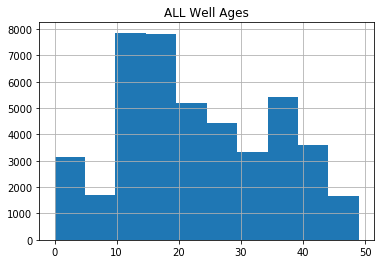

In [331]:
data.hist(column='AGE',bins = 10)
plt.title('ALL Well Ages')

Text(0.5, 1.0, 'SJ Well Ages')

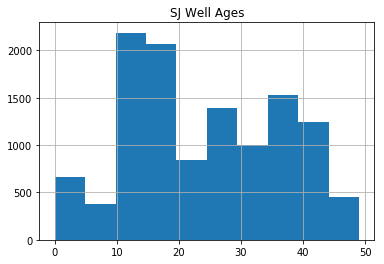

In [332]:
SJ.hist(column='AGE',bins = 10)
plt.title('SJ Well Ages')

Text(0.5, 1.0, 'Permian Well Ages')

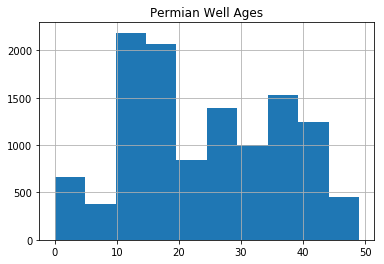

In [333]:
SJ.hist(column='AGE',bins = 10)
plt.title('Permian Well Ages')

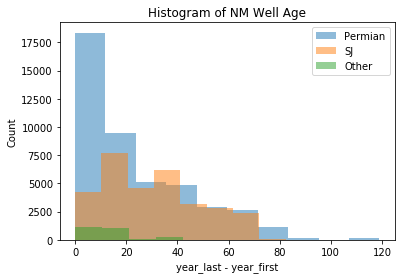

In [410]:

pyplot.hist(Permian['AGE'], bins=10, alpha=0.5, label='Permian')
pyplot.hist(SJ['AGE'], bins=10, alpha=0.5, label='SJ')
pyplot.hist(Other['AGE'], bins=10, alpha=0.5, label='Other')
pyplot.legend(loc='upper right')
pyplot.title('Histogram of NM Well Age')
pyplot.xlabel('year_last - year_first')
pyplot.ylabel('Count')
pyplot.show()

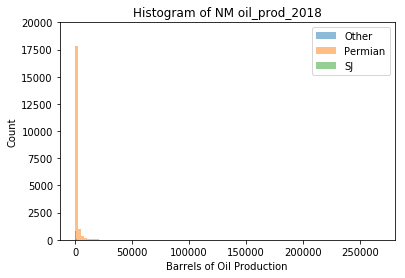

In [413]:
pyplot.hist(Other['oil_prod_2018'], bins=100, alpha=0.5, label='Other')
pyplot.hist(Permian['oil_prod_2018'], bins=100, alpha=0.5, label='Permian')
pyplot.hist(SJ['oil_prod_2018'], bins=100, alpha=0.5, label='SJ')
pyplot.legend(loc='upper right')
pyplot.title('Histogram of NM oil_prod_2018')
pyplot.xlabel('Barrels of Oil Production')
pyplot.ylabel('Count')
pyplot.show()

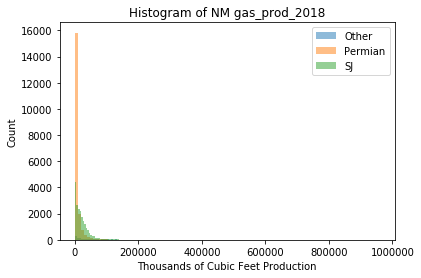

In [414]:
pyplot.hist(Other['gas_prod_2018'], bins=100, alpha=0.5, label='Other')
pyplot.hist(Permian['gas_prod_2018'], bins=100, alpha=0.5, label='Permian')
pyplot.hist(SJ['gas_prod_2018'], bins=100, alpha=0.5, label='SJ')
pyplot.legend(loc='upper right')
pyplot.title('Histogram of NM gas_prod_2018')
pyplot.xlabel('Thousands of Cubic Feet Production')
pyplot.ylabel('Count')
pyplot.show()

In [ ]:
pyplot.hist(data['gas_prod_2018'],bins=[0,15,30,60,100], alpha=0.5, label='ALL')
pyplot.hist(Permian['gas_prod_2018'], bins=[0,15,30,60,100], alpha=0.5, label='Permian')
pyplot.hist(SJ['gas_prod_2018'], bins=[0,15,30,60,100], alpha=0.5, label='SJ')
pyplot.legend(loc='upper right')
pyplot.title('Histogram of NM gas_prod_2018')
pyplot.xlabel('Thousands of Cubic Feet Production')
pyplot.ylabel('Count')
pyplot.show()

In [574]:
data_array = np.asarray(data)
data_array[0]

array([3000100505, '8/12/1940', '2/15/1936', 'Plugged', 'Bernalillo', nan,
       nan, nan, nan, nan, nan, 1940, 1936, 4], dtype=object)

In [350]:
data['gas_prod_2018'].describe()

count     32125.000000
mean      19203.755798
std       33279.345385
min           0.000000
25%        1212.000000
50%        8173.000000
75%       24131.000000
max      958838.000000
Name: gas_prod_2018, dtype: float64

In [45]:
data_array = np.asarray(data)
Yearly_Active = []
for i in range(1970,2020):
    Active_Well_Count = 0
    for j in range(len(data)):
        #Make sure well was drilled before on during year and plugged after year
        if data_array[j][11]>i and data_array[j][12]<=i :
            Active_Well_Count += 1
    Yearly_Active.append(Active_Well_Count)

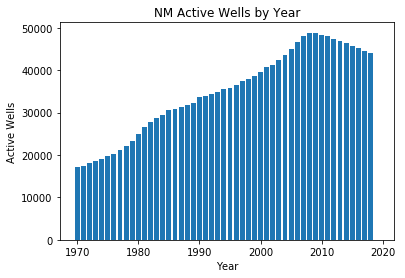

In [578]:
plt.bar(range(1970,2020),Yearly_Active)
plt.ylabel('Active Wells')
plt.xlabel('Year')
plt.title('NM Active Wells by Year')
plt.show()

In [230]:
SJ_array = np.asarray(SJ)
Yearly_Active_SJ = []
for i in range(1970,2020):
    Active_Well_Count = 0
    for j in range(len(SJ)):
        #Make sure well was drilled before on during year and plugged after year
        if SJ_array[j][11]>i and SJ_array[j][12]<=i :
            Active_Well_Count += 1
    Yearly_Active_SJ.append(Active_Well_Count)

In [231]:
Permian_array = np.asarray(Permian)
Yearly_Active_Permian = []
for i in range(1970,2020):
    Active_Well_Count = 0
    for j in range(len(Permian)):
        #Make sure well was drilled before on during year and plugged after year
        if Permian_array[j][11]>i and Permian_array[j][12]<=i :
            Active_Well_Count += 1
    Yearly_Active_Permian.append(Active_Well_Count)

In [232]:
Other_array = np.asarray(Other)
Yearly_Active_Other = []
for i in range(1970,2020):
    Active_Well_Count = 0
    for j in range(len(Other)):
        #Make sure well was drilled before on during year and plugged after year
        if Other_array[j][11]>i and Other_array[j][12]<=i :
            Active_Well_Count += 1
    Yearly_Active_Other.append(Active_Well_Count)

In [233]:
DF = np.zeros((3,len(Yearly_Active_Permian)))

In [234]:
DF[0] = Yearly_Active_Other
DF[1] = Yearly_Active_SJ
DF[2] = Yearly_Active_Permian

In [235]:
DF = DF.T

In [236]:
DF =  pd.DataFrame(DF)

In [237]:
#idx_rename = {'Avatar':'Ratava', 'Spectre': 'Ertceps'} 
col_rename = {0:'Other', 1: 'San Juan', 2:'Permian'}
DF_Rename = DF.rename(columns=col_rename)#index=idx_rename,

In [238]:
DF_Rename.head()

,Other,San Juan,Permian
0,15.0,9111.0,8074.0
1,18.0,9203.0,8290.0
2,19.0,9531.0,8496.0
3,18.0,9863.0,8695.0
4,28.0,10101.0,8934.0


In [241]:
DF_Rename.head()

,Other,San Juan,Permian,Year
0,15.0,9111.0,8074.0,1970
1,18.0,9203.0,8290.0,1971
2,19.0,9531.0,8496.0,1972
3,18.0,9863.0,8695.0,1973
4,28.0,10101.0,8934.0,1974


In [239]:
DF_Rename['Year'] = range(1970,2020)

In [240]:
DF = DF_Rename.set_index('Year')

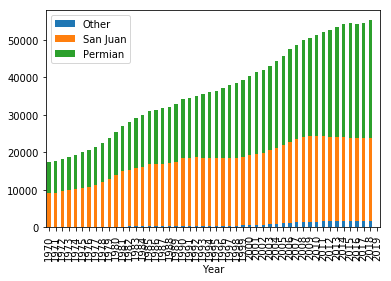

In [199]:
#ax = DF.plot(x_compat=True)
#DF.plot.locator_params(axis='x', nbins=10)
#x = np.arange(1970,2020,2)
#x = pd.DataFrame(x)

ax = DF.plot(kind='bar', stacked=True)#, xticks = np.arange(1970,2020,3))
#ax.set_xticks(x)
#pyplot.locator_params(axis='x', nbins=10)
#plt.locator_params(numticks=12)
#plt.xticks([1970,1980,1990],['1970','1980','1990'])



In [245]:
Yearly_Active_Other_array = np.asarray(Yearly_Active_Other)

In [246]:
Yearly_Active_SJ_array = np.asarray(Yearly_Active_SJ)

In [247]:
Yearly_Active_Permian_array = np.asarray(Yearly_Active_Permian)

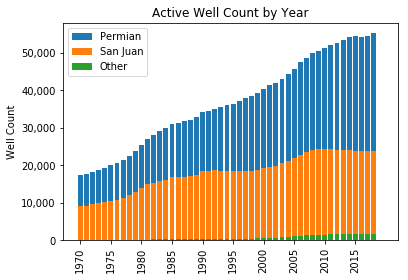

In [215]:
p1 = plt.bar(range(1970,2020),Yearly_Active_Permian_array, label ='Permian', bottom=Yearly_Active_Other_array+Yearly_Active_SJ_array)
p2 = plt.bar(range(1970,2020),Yearly_Active_SJ_array, label = 'SJ', bottom = Yearly_Active_Other_array)
p3 = plt.bar(range(1970,2020),Yearly_Active_Other_array, label = 'Other')

plt.ylabel('Well Count')
plt.title('Active Well Count by Year')
plt.xticks(range(1970,2020,5),rotation='vertical')


plt.yticks(np.arange(0,60000,10000),('0','10,000','20,000','30,000','40,000','50,000','60,000')) # Set locations and labels
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0],p2[0], p3[0]), ('Permian','San Juan', 'Other'))
plt.show()

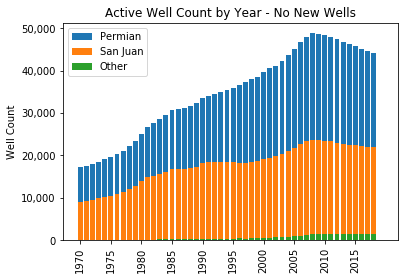

In [249]:
p1 = plt.bar(range(1970,2020),Yearly_Active_Permian_array, label ='Permian', bottom=Yearly_Active_Other_array+Yearly_Active_SJ_array)
p2 = plt.bar(range(1970,2020),Yearly_Active_SJ_array, label = 'SJ', bottom = Yearly_Active_Other_array)
p3 = plt.bar(range(1970,2020),Yearly_Active_Other_array, label = 'Other')

plt.ylabel('Well Count')
plt.title('Active Well Count by Year - No New Wells')
plt.xticks(range(1970,2020,5),rotation='vertical')


plt.yticks(np.arange(0,60000,10000),('0','10,000','20,000','30,000','40,000','50,000','60,000')) # Set locations and labels
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0],p2[0], p3[0]), ('Permian','San Juan', 'Other'))
plt.show()

In [157]:
DF

,Other,San Juan,Permian
Year,,,
1970,17.0,9126.0,8331.0
1971,20.0,9219.0,8551.0
1972,21.0,9547.0,8764.0
1973,20.0,9881.0,8967.0
1974,30.0,10121.0,9208.0
1975,33.0,10472.0,9457.0
1976,32.0,10821.0,9724.0
1977,35.0,11365.0,10034.0
1978,34.0,12056.0,10400.0


In [111]:
x = range(1970,2020)
x.type()

AttributeError: 'range' object has no attribute 'type'

In [242]:
DF.to_csv('NM_Wells_Active_NewDropped.csv', encoding= 'utf8')

In [50]:
Yearly_Active_Permian

[8074,
 8290,
 8496,
 8695,
 8934,
 9181,
 9445,
 9750,
 10105,
 10531,
 11080,
 11788,
 12498,
 13011,
 13488,
 13911,
 14126,
 14433,
 14677,
 14962,
 15320,
 15644,
 15953,
 16512,
 17008,
 17487,
 18242,
 19069,
 19518,
 19897,
 20597,
 21189,
 21388,
 21965,
 22578,
 23316,
 24068,
 24591,
 25069,
 25025,
 24852,
 24631,
 24356,
 24050,
 23765,
 23384,
 22946,
 22467,
 22052,
 0]

In [300]:
data_array = np.asarray(data)

In [314]:
data_array[2][12]

1979

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B82AD7908>]],
      dtype=object)

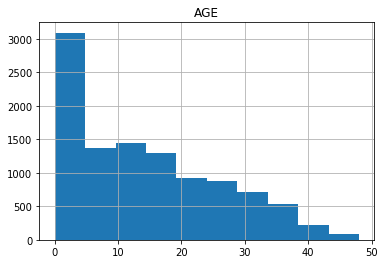

In [187]:
data[data['AGE']>-1].hist(column='AGE',bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B82A406D8>]],
      dtype=object)

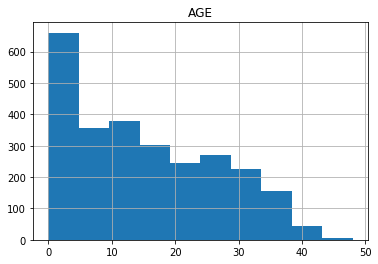

In [188]:
SJ[SJ['AGE']>-1].hist(column='AGE',bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B90E1A390>]],
      dtype=object)

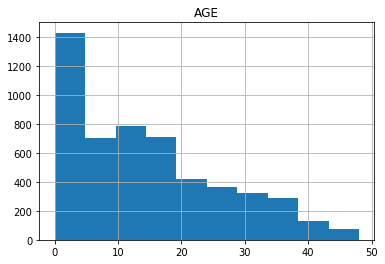

In [189]:
Permian[Permian['AGE']>-1].hist(column='AGE',bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B86BF36A0>]],
      dtype=object)

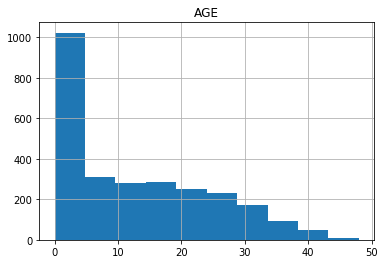

In [190]:
Other[Other['AGE']>-1].hist(column='AGE',bins = 10)

In [6]:
#WELL STATUS TYPES THAT INDICATE WELL WAS DEACTIVATED
inactive_types=['ABANDONED', 'INACTIVE', 'NOTICE OF INTENT TO ABANDON', 'ABANDON', 'P & A', 'PA', 'PLUGGED', 'PLUGGED & ABANDONED', 'SHUT IN', 'SHUT-IN', 'SI']

In [7]:
#selects a subset from inactive type list
inactive_wells=data[data.STATUS.isin(inactive_types)]

In [8]:
#calculate BOE/day production
inactive_wells['BOE']=(((inactive_wells.LATEST_GAS)/6)+(inactive_wells.LATEST_LIQ)/30) #BOE/DAY

C:\Users\khenk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
#plot number of wells inactivated in each year (use column year_last)

# df1 = data.groupby('year_last').count()
# df1['Unnamed: 0'].plot()
df1 = data.groupby('COMPL_STATUS').count()

In [15]:
df2 = data.groupby('COMPL_STATUS').describe()

In [13]:
df1

,ACRES,API,OPERATOR,PLUG_DATE,PRODUCING_POOLID,PROPERTY,RANGE,SDIV_UL,SECTION,SPUD_DATE,...,LATITUDE,LONGITUDE,NBR_COMPLS,NS_CD,OCD_UL,OGRID_CDE,oil_prod_2017,oil_prod_2018,oil_prod_2019,ONE_PRODUCING_POOL_NAME
COMPL_STATUS,,,,,,,,,,,,,,,,,,,,,
Active,48774,48774,48774,0,43797,48774,48774,48774,48774,43902,...,48774,48774,48774,48774,48329,48774,44599,44314,48,43797
Dry Hole,12,12,12,0,0,12,12,12,12,12,...,12,12,12,12,12,12,1,1,0,0
Never Drilled,21,21,21,0,0,21,21,21,21,0,...,21,21,21,21,19,21,0,0,0,0
New (Not drilled or compl),18949,18949,18949,0,92,18949,18949,18949,18949,10493,...,18949,18949,18949,18949,18729,18949,8413,9400,0,92
Plugged,30506,42158,42156,41996,5509,42158,42158,41942,42158,35053,...,42158,42158,30506,41626,41736,42158,1216,630,0,5509
TA,850,850,850,0,120,850,850,850,850,619,...,850,850,850,850,848,850,492,470,4,120
Zone Plugged,34,34,34,0,2,34,34,34,34,26,...,34,34,34,34,34,34,4,4,0,2
"Zones Aban, not plgd",8,8,8,0,6,8,8,8,8,8,...,8,8,8,8,8,8,5,5,0,6


In [17]:
df2

ACRES                                        \
                              count        mean         std    min    25%   
COMPL_STATUS                                                                
Active                      48774.0  214.702583  193.777145   0.00   40.0   
Dry Hole                       12.0  109.995833  126.627228  40.00   40.0   
Never Drilled                  21.0   43.809524   12.031704  40.00   40.0   
New (Not drilled or compl)  18949.0  212.821131  314.151979   0.00   40.0   
Plugged                     30506.0   70.598567   93.131850  24.16   40.0   
TA                            850.0   99.082212  148.177394  35.19   40.0   
Zone Plugged                   34.0   52.941176   41.453107  40.00   40.0   
Zones Aban, not plgd            8.0  228.743750  128.663113  40.00  130.0   

                                                            API                \
                                50%       75%      max    count          mean   
COMPL_STATUS                                                                    
Active                      160.000  320.0000  1920.00  48774.0  3.002952e+09   
Dry Hole                     40.000  109.9875   320.00     12.0  3.001494e+09   
Never Drilled                40.000   40.0000    80.00     21.0  3.002272e+09   
New (Not drilled or compl)  160.000  320.0000  9237.30  18949.0  3.002221e+09   
Plugged                      40.000   40.0000  1601.28  42158.0  3.002638e+09   
TA                           40.000   40.0000   644.60    850.0  3.002427e+09   
Zone Plugged                 40.000   40.0000   240.00     34.0  3.002572e+09   
Zones Aban, not plgd        314.975  320.0000   320.00      8.0  3.002711e+09   

                            ... oil_prod_2018           oil_prod_2019  \
                            ...           75%       max         count   
COMPL_STATUS                ...                                         
Active                      ...         331.0  266871.0          48.0   
Dry Hole                    ...         873.0     873.0           0.0   
Never Drilled               ...           NaN       NaN           0.0   
New (Not drilled or compl)  ...       17743.5  683476.0           0.0   
Plugged                     ...           0.0   49859.0           0.0   
TA                          ...         953.5   47398.0           4.0   
Zone Plugged                ...        4505.5   10873.0           0.0   
Zones Aban, not plgd        ...        1506.0    2134.0           0.0   

                                                                          \
                               mean         std  min   25%   50%     75%   
COMPL_STATUS                                                               
Active                      267.875  667.703961  0.0  0.75  48.5  271.25   
Dry Hole                        NaN         NaN  NaN   NaN   NaN     NaN   
Never Drilled                   NaN         NaN  NaN   NaN   NaN     NaN   
New (Not drilled or compl)      NaN         NaN  NaN   NaN   NaN     NaN   
Plugged                         NaN         NaN  NaN   NaN   NaN     NaN   
TA                           26.500   53.000000  0.0  0.00   0.0   26.50   
Zone Plugged                    NaN         NaN  NaN   NaN   NaN     NaN   
Zones Aban, not plgd            NaN         NaN  NaN   NaN   NaN     NaN   

                                    
                               max  
COMPL_STATUS                        
Active                      3652.0  
Dry Hole                       NaN  
Never Drilled                  NaN  
New (Not drilled or compl)     NaN  
Plugged                        NaN  
TA                           106.0  
Zone Plugged                   NaN  
Zones Aban, not plgd           NaN  

[8 rows x 224 columns]

In [21]:
data['SPUD_DATE']

0          2/15/1936
1           3/7/1964
2          3/27/1964
3          4/24/1964
4          9/27/1938
5           8/9/1948
6           1/1/1900
7           1/1/1900
8          7/13/1933
9           5/2/1941
10         9/21/1972
11         10/4/1978
12        11/23/1979
13         2/15/1981
14         2/18/1984
15         9/12/1997
16         9/29/1997
17         2/21/1948
18               NaN
19         4/27/2005
20          4/1/2005
21        12/13/1972
22         9/16/2006
23               NaN
24          1/1/1900
25          1/1/1900
26          8/5/1959
27         3/13/1966
28          1/1/1900
29          1/1/1900
             ...    
111412      1/1/1900
111413      1/1/1900
111414      1/1/1900
111415      1/1/1900
111416      1/1/1900
111417      1/1/1900
111418      1/1/1900
111419      1/1/1900
111420      1/1/1900
111421      1/1/1900
111422      1/1/1900
111423      1/1/1900
111424      1/1/1900
111425      1/1/1900
111426      1/1/1900
111427      1/1/1900
111428      1

In [20]:
data.hist(column='SPUD_DATE')

ValueError: num must be 1 <= num <= 0, not 1

<Figure size 432x288 with 0 Axes>

(849886, 18)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002578679A470>]],
      dtype=object)

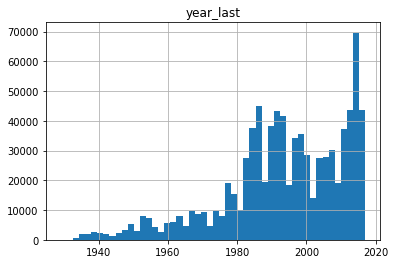

In [10]:
#plot histogram of BOE/day production for wells that were inactive - if you can't see detail, adjust binsize, we are particularly interested in the 0-15 BOE/day production range because these wells are considered 'marginal' for regulatory purposes
print(inactive_wells[inactive_wells['BOE']<16].shape)
inactive_wells[inactive_wells['BOE']<16].hist(column='year_last', bins=50)

In [19]:
inactive_wells.columns

Index(['Unnamed: 0', 'API_NO', 'COUNTY', 'ENTITY_ID', 'FIRST_PROD_DATETIME',
       'GAS_CUM', 'GAS_GRAV', 'LAST_PROD_DATETIME', 'LATEST_GAS', 'LATEST_LIQ',
       'LIQ_CUM', 'LIQ_GRAV', 'MONTHS_PRODUCED', 'STATE', 'STATUS',
       'year_first', 'year_last', 'BOE'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257874C2668>]],
      dtype=object)

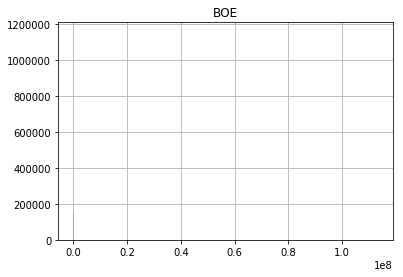

In [21]:
inactive_wells.hist(column='BOE',bins = 10000)

(447431, 18)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000168033E49B0>]],
      dtype=object)

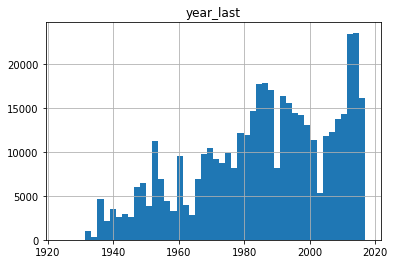

In [47]:
print(inactive_wells[inactive_wells['BOE']>=16].shape)
inactive_wells[inactive_wells['BOE']>=16].hist(column='year_last', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A87AC19DD8>]],
      dtype=object)

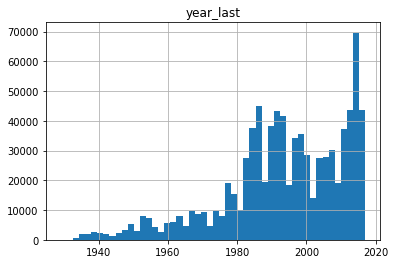

In [39]:
inactive_wells[inactive_wells['BOE']].hist(column='year_last', bins=50)

In [11]:
#inactive_wells.hist(column ='BOE', range=(min(inactive_wells['BOE']),max(inactive_wells['BOE'])),bins=50)
x = np.asarray(inactive_wells['BOE'])
# len(inactive_wells['BOE'])
# inactive_wells['BOE'].min
# inactive_wells['BOE'].max
min(x)

x=x.astype(int)
min(x)
max(x)

113312187

(array([1.297309e+06, 6.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([-2.24890000e+04,  1.13109786e+07,  2.26444462e+07,  3.39779138e+07,
         4.53113814e+07,  5.66448490e+07,  6.79783166e+07,  7.93117842e+07,
         9.06452518e+07,  1.01978719e+08,  1.13312187e+08]),
 <a list of 10 Patch objects>)

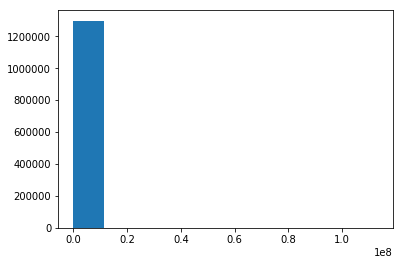

In [12]:
plt.hist(x)

In [13]:
inactive_wells


,Unnamed: 0,API_NO,COUNTY,ENTITY_ID,FIRST_PROD_DATETIME,GAS_CUM,GAS_GRAV,LAST_PROD_DATETIME,LATEST_GAS,LATEST_LIQ,LIQ_CUM,LIQ_GRAV,MONTHS_PRODUCED,STATE,STATUS,year_first,year_last,BOE
0,0,50-733-10052-00,(N/A) (AK),104324236,1965-07-01,NaN,NaN,1965-07-01,515.000000,1684.000000,NaN,NaN,NaN,AK,P & A,1965,1965,141.966667
1,1,50-733-10063-00,(N/A) (AK),104324261,1965-07-01,NaN,NaN,1965-07-01,0.000000,1402.000000,NaN,NaN,NaN,AK,P & A,1965,1965,46.733333
2,2,50-733-10044-00,(N/A) (AK),104324230,1965-11-01,NaN,NaN,1965-11-01,0.000000,1324.000000,NaN,NaN,NaN,AK,P & A,1965,1965,44.133333
3,3,50-733-10066-00,(N/A) (AK),129778149,1965-11-01,NaN,NaN,1965-11-01,0.000000,1159.000000,NaN,NaN,NaN,AK,P & A,1965,1965,38.633333
4,4,50-733-10064-00,(N/A) (AK),104324262,1965-11-01,NaN,NaN,1965-12-01,0.000000,119.000000,NaN,NaN,NaN,AK,P & A,1965,1965,3.966667
5,5,50-733-10081-00,(N/A) (AK),129778088,1965-12-01,NaN,NaN,1971-07-01,260.000000,302.000000,NaN,NaN,NaN,AK,P & A,1965,1971,53.400000
6,6,50-733-10082-00,(N/A) (AK),129778090,1965-12-01,NaN,NaN,1995-05-01,310.000000,479.000000,NaN,NaN,NaN,AK,P & A,1965,1995,67.633333
7,7,50-733-10084-00,(N/A) (AK),129778093,1965-12-01,NaN,NaN,1981-01-01,0.000000,1509.000000,NaN,NaN,NaN,AK,P & A,1965,1981,50.300000
8,8,50-733-10085-00,(N/A) (AK),129778075,1966-02-01,NaN,NaN,1984-07-01,0.000000,80.000000,NaN,NaN,NaN,AK,P & A,1966,1984,2.666667
9,9,50-733-10073-00,(N/A) (AK),129778155,1966-04-01,NaN,NaN,2003-06-01,939.000000,1248.000000,NaN,NaN,NaN,AK,SHUT IN,1966,2003,198.100000


In [33]:
inactive_wells['BOE'].describe()

count    1.297317e+06
mean     7.613920e+02
std      1.159499e+05
min     -2.248950e+04
25%      5.666667e-01
50%      4.666667e+00
75%      3.800000e+01
max      1.133122e+08
Name: BOE, dtype: float64

In [35]:
inactive_wells['BOE'].boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

In [36]:
max(x)

113312187.83333334

In [13]:
849886+446616+815

1297317

In [26]:
from scipy import stats
NO_OUt = inactive_wells['BOE'][(np.abs(stats.zscore(inactive_wells['BOE'])) < 3).all()]

In [27]:
NO_OUt

141.96666666666667

In [30]:
inactive_wells['BOE']

46.733333333333334

In [31]:
find(inactive_wells['BOE']<16)

NameError: name 'find' is not defined